In [11]:
from bs4 import BeautifulSoup
from cv2 import cv2
import os

In [25]:
import matplotlib.pyplot as plt

def show(image, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(image[:, :, ::-1]) if image.ndim==3 else plt.imshow(image, "gray")
    plt.title(title)
    plt.show()

In [28]:
home_path = "../Data/Kaggle_Medical_Mask_Dataset/medical-masks-dataset/"
labels_path = os.path.join(home_path, "labels")

In [29]:
save_path = "../Data/Kaggle_Medical_Mask_Dataset/segmented/"

In [56]:
object_labels = {}

for xml_filename in sorted(os.listdir(labels_path)):
    with open(os.path.join(labels_path,xml_filename), 'r') as f:
        data = f.read()
    xml_data = BeautifulSoup(data, "xml")
    image_name = xml_data.find('filename').text
    image_path = os.path.join(home_path, "images", image_name)
    image = cv2.imread(image_path)
    objects = xml_data.find_all('object')
    for object_ in objects:
        object_label = object_.find('name').text
        x1 = int(object_.find('xmin').text)
        y1 = int(object_.find('ymin').text)
        x2 = int(object_.find('xmax').text)
        y2 = int(object_.find('ymax').text)
        if x1 > x2:
            print("X Interchange Happened")
            x1, x2 = x2, x1
        if y1 > y2:
            print("Y Interchange Happened")
            y1, y2 = y2, y1
        segmented_image = image[y1:y2, x1:x2]
        if object_label in object_labels:
            object_labels[object_label] += 1
        else:
            object_labels[object_label] = 1
            os.mkdir(os.path.join(save_path, object_label))
        cv2.imwrite(os.path.join(save_path, 
                                 object_label,
                                 "{}.png".format(object_labels[object_label])), 
                    segmented_image)

X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchange Happened
X Interchan

In [55]:
object_labels

{'mask': 243, 'none': 54, 'poor': 8}

In [49]:
segmented_image

array([], shape=(238, 0, 3), dtype=uint8)

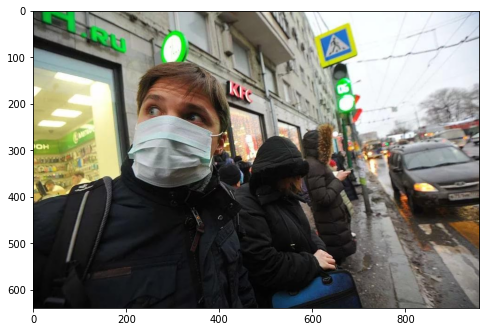

In [51]:
show(image)

In [52]:
x1,x2,y1,y2

(423, 216, 143, 381)

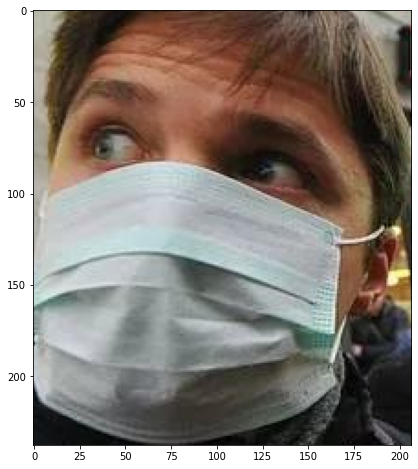

In [53]:
show(image[143:381, 216:423])

In [54]:
object_label

'mask'